In [112]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from scipy.signal import wiener
from skimage.metrics import structural_similarity as ssim
import os

In [113]:
image_Path = r'D:\py\Digital_Image_Processing\Image\Image_for_Frequency\cameraman.tif' 
I =  cv2.imread(image_Path, cv2.IMREAD_GRAYSCALE)

In [119]:
k = 4

H = np.ones((k, k)) / (k^2)

Y = convolve2d(I, H)

In [120]:
h, w = Y.shape

H_dft = np.fft.fft2(H, (h, w))    
Y_dft = np.fft.fft2(Y, (h, w))
I_dft = Y_dft / (H_dft)

I_restore = np.fft.ifft2(I_dft)
I_restore = np.abs(I_restore)
I_restore = I_restore[1:I.shape[0], 1:I.shape[1]]

(np.float64(-0.5), np.float64(254.5), np.float64(254.5), np.float64(-0.5))

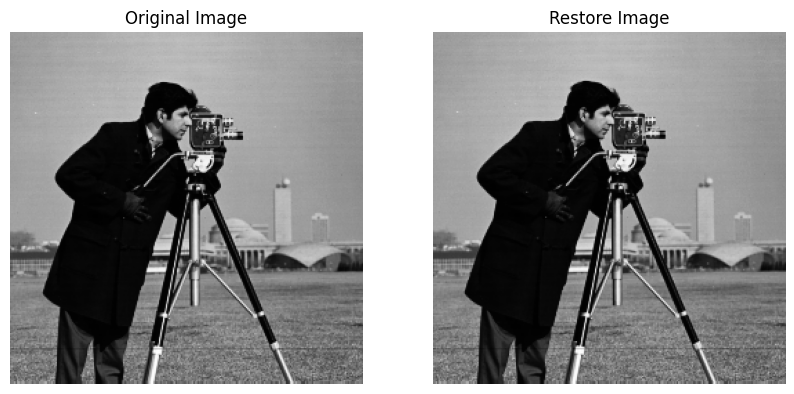

In [121]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(I_restore, cmap='gray')
plt.title("Restore Image")
plt.axis('off')

(np.float64(-0.5), np.float64(258.5), np.float64(258.5), np.float64(-0.5))

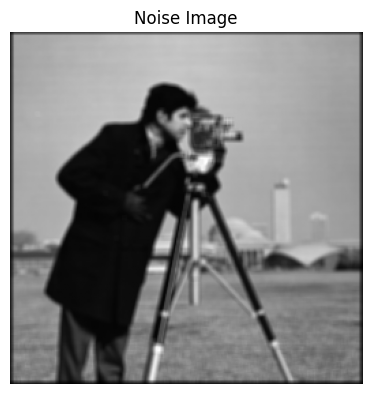

In [ ]:
sigma = 0.1
Y_1 = Y + sigma * (np.random.randn(*Y.shape))

denoise = wiener(Y_1, mysize=4)

plt.figure(figsize = (10, 8))
plt.subplot(1, 2, 1)
plt.imshow(Y_1, cmap='gray')
plt.title("Noise Image")
plt.axis('off')

In [125]:
Y1_dft = np.fft.fft2(Y_1, (h, w))
I_dft_1 = Y1_dft / (H_dft)
I_restore = np.fft.ifft2(I_dft_1)
I_restore = np.abs(I_restore)
I_restore = I_restore[1:I.shape[0], 1:I.shape[1]]


(np.float64(-0.5), np.float64(254.5), np.float64(254.5), np.float64(-0.5))

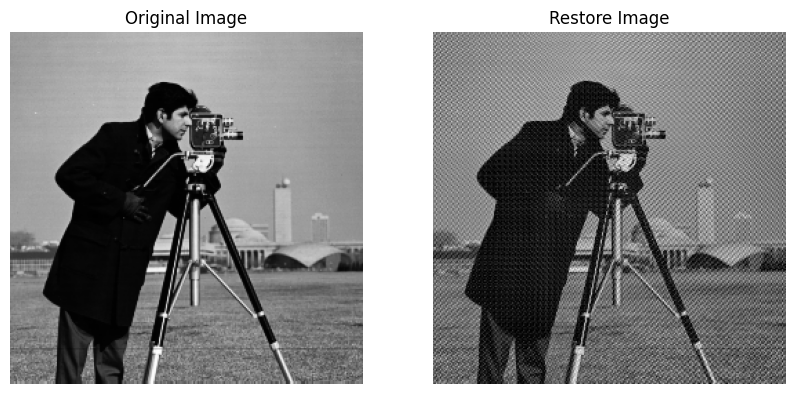

In [127]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(I_restore, cmap='gray')
plt.title("Restore Image")
plt.axis('off')